# Goal: Create Customer Profiles for an LGS

In [1]:
import pandas as pd
import wrangle_profiles as wp

import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Methodology:

1. Divide store items into categories
2. Calculate the total number of items that each customer has purchased in each category
3. Use dbscan to cluster customers and create groups based on those clusters
4. Analyze each group and develop a profiles based on that analysis 

# Prepare Steps

## General

1. Read in sales data by year and merge files into one dataframe <br>
<br>
2. Remove non-payment rows <br>
<br>
3. Create datetime column and set index to the datetime column <br>
<br>
4. Delete unused columns and Rename remaining columns for ease of use <br>
<br>
5. Clean text in ID <br>
<br>
4. Clean text in net_sales and convert to int <br>
<br>
5. Clean text in cart and convert items string to a list of those items <br>
<br>
6. Fill Null values using
  * ‘unregistered’ for the id column <br>
  * ‘No-discount’ for the discount  <br>
<br>
7. Add a column for each item showing the nuber of that item bought in each transaction <br>
<br>
8. Add a column for each category of item showing the number of items bought in that catagory  <br>

## Project Specific

1. Restrict data to purchases made in 2023 <br>
<br>
2. Drop all unrelated columns <br>
<br>
3. Drop rows where id is unregistered <br>
<br>
4. Create scaled columns for each category column <br>

In [2]:
df = w.get_prepared_data()
df.head()

,id,cart,discount,gross_sales,discount_amount,net_sales,year,month,day,weekday,...,accessories,board_games,concessions,modeling_supplies,role_playing_games,minis_models,trading_card_games,other,game_room_rental,all_items
2021-01-01 15:07:02,T49C25V8WS37VB4RSJTBN13TSR,['dragon_shield_sleeves:_matte_blue'],no_discount,$11.99,$0.00,11.99,2021,1,1,Friday,...,1,0,0,0,0,0,0,0,0,1
2021-01-01 15:09:20,F36VZJMBMH3PH5SN664GPV4NQR,['ultra_pro-100_deck_box_white_2020_-_aw12892'],no_discount,$5.99,$0.00,5.99,2021,1,1,Friday,...,1,0,0,0,0,0,0,0,0,1
2021-01-01 16:30:31,BBBRQPD57S3YV4GJG1CCB6ATGC,"['candy', 'dungeons_&_dragons:_icewind_dale', ...",no_discount,$31.25,$0.00,31.25,2021,1,1,Friday,...,0,0,1,0,1,1,0,0,0,3
2021-01-01 16:31:27,W67T53BZFD5VQ8J3W7387X8SW0,"['candy', 'double_sided_battlemap_-_chx96246']",no_discount,$21.25,$0.00,21.25,2021,1,1,Friday,...,0,0,1,0,0,1,0,0,0,2
2021-01-01 19:36:24,F4RYR1ARCD7ZDD4E9PFYRVF6H0,"['dex_binder', '3_x_custom_amount', 'candy', '...",Military,$257.14,-$25.50,231.64,2021,1,1,Friday,...,1,0,2,0,0,0,0,4,0,7


In [8]:
df.describe()

,net_sales,year,month,day,000:_adeptus_astartes_mark_3_space_marines,000:_adeptus_mechanicus_skitarii_-_59-10,000:_assault_intercessors_+_paints_set_-_60-11,000:_astra_militarum_cadian_command_squad,000:_astra_militarum_cadian_heavy_weapons_squad_-_47-19,000:_astra_militarum_cadian_infantry_squad,...,accessories,board_games,concessions,modeling_supplies,role_playing_games,minis_models,trading_card_games,other,game_room_rental,all_items
count,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,...,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000,19696.000000
mean,39.381388,2022.068542,6.680189,15.772847,0.000051,0.000051,0.000355,0.000051,0.000051,0.000051,...,0.380077,0.102864,1.020410,0.221416,0.031275,0.137033,0.980808,0.289500,0.015841,3.179377
std,61.312735,0.827475,3.380293,8.670018,0.007125,0.007125,0.018849,0.007125,0.007125,0.007125,...,1.102669,0.450640,1.660096,1.288956,0.217854,0.722297,3.980715,0.787219,0.129650,4.330795
min,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.200000,2021.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,17.970000,2022.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,45.172500,2023.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
max,987.030000,2023.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,14.000000,20.000000,90.000000,8.000000,31.000000,96.000000,36.000000,3.000000,98.000000


accessories Hist


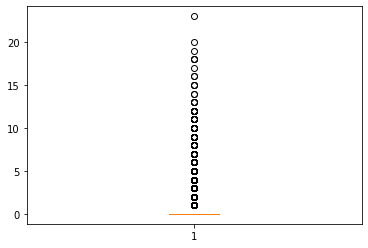

board_games Hist


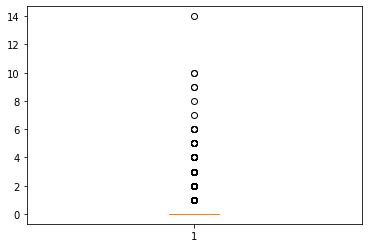

concessions Hist


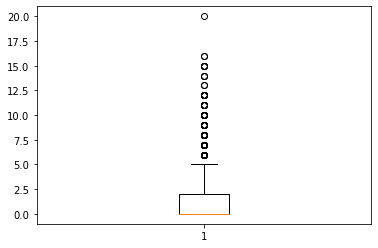

modeling_supplies Hist


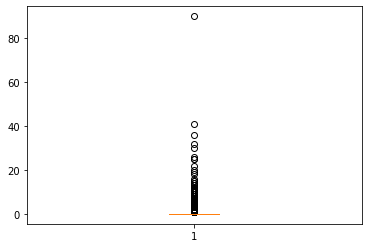

role_playing_games Hist


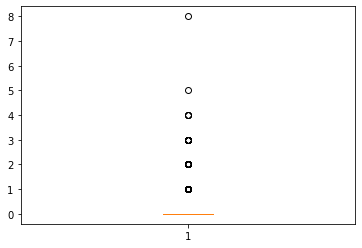

minis_models Hist


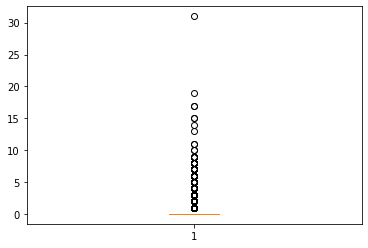

trading_card_games Hist


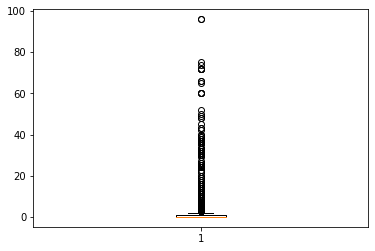

game_room Hist


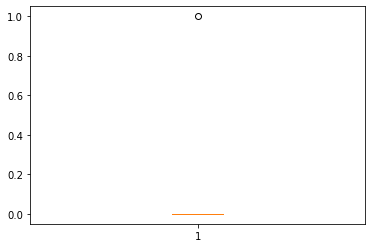

In [10]:
cols = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games',
        'game_room']

for col in cols:
    
    
    print(col, 'Hist')
    
    plt.boxplot(df[col])
    
    plt.show()
    

In [ ]:
# Prepare data for project
df = w.get_prepared_data()
df = wp.get_profiles_data(df)

In [ ]:
df.head()

# Data Dictionary

Rows in the original data represent a record for each purchase made at LGS in the years 2021, 2022, and 2023. <br>
The final transformation of the data will contain columns showing the total number of purchases made by a given customer across several categories in 2023. It will also show the total number of sales and net sales in dollars (sales after removing discounts) for each customer in 2023. Categories include the following:


|Category|Description|Examples|
|--------|-----------|--------|
|Accessories|Items that enhance game play or are used to store game play items|Binders, Dice, Card Sleeves|
|Board Games|Self contained board games and board game expansions|Terraforming Mars, LOTR Journies in Middle Earth|
|Concessions|Food and drink items|drinks, candy|
|Minis/Models|Miniature models, contained in customizable table top minis games or sold as stand alone minis or sets of minis Does not include boardgames that contain minis|Warhammer Minis, D&D Minis|
|Modeling Supplies|Items used to enhance appearance of minis/models|Painting Supplies, Model Bases|
|Role Playing Games|Books and map packs for Role Playing Games|Dungeons and Dragons Books, Pathfinder Books|
|Trading Card Games|Cards for customizable card games|Magic, Pokemon, Yugio|


* Some store items could not be classified and were not included in catagory counts but were included in the total item count Example 'customamount'


# Exploration

In [ ]:
df.describe()

In [ ]:
from sklearn.cluster import DBSCAN 

cols = ['accessories_scaled', 
        'board_games_scaled', 
        'concessions_scaled',
        'modeling_supplies_scaled', 
        'role_playing_games_scaled', 
        'minis_models_scaled',
        'trading_card_games_scaled',
        'game_room_rental']

X = df[cols]

model = DBSCAN().fit(X)

df['cluster'] = model.labels_

df.cluster.value_counts()

In [ ]:
df[df.cluster == 0].describe()

In [ ]:
df[df.cluster == 2].describe()

In [ ]:
df[df.cluster == 5].describe()

In [ ]:
df[df.cluster == 4].describe()

In [ ]:
df[df.cluster == 6].describe()

In [ ]:
df[df.cluster == 3].describe()

In [ ]:
df[df.cluster == 7].describe()

In [ ]:
df[df.cluster == 1].describe()

In [ ]:
df[df.cluster == 8].describe()

In [ ]:
df[df.cluster == 9].describe()

In [ ]:
from itertools import combinations
from scipy.stats import spearmanr

cols = ['accessories_scaled', 
        'board_games_scaled', 
        'concessions_scaled',
        'modeling_supplies_scaled', 
        'role_playing_games_scaled', 
        'minis_models_scaled',
        'trading_card_games_scaled',
        'game_room_rental',
        'all_items']

combs = combinations(cols, 2)

for pair in combs:
    
    plt.scatter(df[{pair[0]}], df[{pair[1]}])
    
    plt.xlabel({pair[0]})
    plt.ylabel({pair[1]})
    
    plt.show()
    
    print(" Correlation           P-value")
    print(spearmanr(df[f'{pair[0]}'], df[f'{pair[1]}']))